In [17]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 kB 5.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

# sentiment analysis for movie reviews 
# with Random forest and mlp

In [2]:
import pandas as pd
import spacy
nlp = spacy.load("en_core_web_sm")

from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/groupProject/rotten_tomatoes_critic_reviews.csv'
import pandas as pd
df = pd.read_csv(file_path , header=0)
data=df[['review_type','review_content']]
data.head()

Mounted at /content/drive


,review_type,review_content
0,Fresh,A fantasy adventure that fuses Greek mythology...
1,Fresh,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,Fresh,With a top-notch cast and dazzling special eff...
3,Fresh,Whether audiences will get behind The Lightnin...
4,Rotten,What's really lacking in The Lightning Thief i...


In [3]:
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
review_type           0
review_content    65806
dtype: int64


In [4]:
dataCleaned= data.dropna()
dataCleaned.head()
missing_values = dataCleaned.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
review_type       0
review_content    0
dtype: int64


review_type
Fresh     681035
Rotten    383176
Name: count, dtype: int64

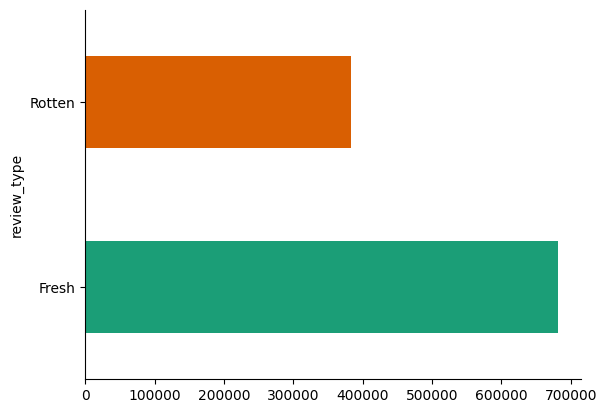

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
dataCleaned.groupby('review_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
dataCleaned['review_type'].value_counts()

In [ ]:
# here we will remove stopwords, punctuations
# as well as we will apply lemmatization

In [5]:
import pandas as pd

target_level_1_data = dataCleaned[dataCleaned['review_type'] == 'Fresh']
target_level_2_data = dataCleaned[dataCleaned['review_type'] == 'Rotten']

sampled_data_level_1 = target_level_1_data.sample(n=30000, random_state=42)
sampled_data_level_2 = target_level_2_data.sample(n=30000, random_state=42)

sampled_data = pd.concat([sampled_data_level_1, sampled_data_level_2])

# Reset index if needed
sampled_data.reset_index(drop=True, inplace=True)
print(sampled_data['review_type'].value_counts())

review_type
Fresh     30000
Rotten    30000
Name: count, dtype: int64


In [6]:
x = sampled_data['review_content']
y = sampled_data['review_type']

### Create a function to clean the data

In [7]:
import string
from spacy.lang.en.stop_words import STOP_WORDS

influential_stop_words = {
    'only', 'alone', 'but', 'except', 'however', 'although', 'though', 'neither', 'nevertheless',
    'either', 'yet', 'not', 'no', 'none', 'nobody', 'nothing', 'nowhere', 'nor', 'without', 'except'
}

punct = string.punctuation
stopwords = list(STOP_WORDS - influential_stop_words)


def text_data_cleaning(sentence):
    doc = nlp(sentence)

    tokens = [] # list of tokens
    for token in doc:
        if token.lemma_ != "-PRON-":
            temp = token.lemma_.lower().strip()
        else:
            temp = token.lower_
        tokens.append(temp)

    cleaned_tokens = []
    for token in tokens:
        if token not in stopwords and token not in punct:
            cleaned_tokens.append(token)
    return cleaned_tokens


## 1. Random forest:

####  using Vectorization Feature Engineering (TF-IDF)

In [8]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [9]:
tfidf = TfidfVectorizer(tokenizer=text_data_cleaning)

In [10]:

from sklearn.model_selection import train_test_split

x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.25, random_state=42)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
import spacy

# Initialize spaCy's English language model
nlp = spacy.load("en_core_web_sm")

# train a RandomForestClassifier on the training set
model = RandomForestClassifier(random_state=42)

clf = Pipeline([('tfidf',tfidf), ('clf',model)])
# it will first do vectorization and then it will do classification



/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [15]:
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print ("Accuracy: ", accuracy_score(y_pred, y_test))
print("Classification report: \n", classification_report(y_pred, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Accuracy:  0.7256666666666667
Classification report: 
               precision    recall  f1-score   support

       Fresh       0.70      0.73      0.72      5705
      Rotten       0.75      0.72      0.73      6295

    accuracy                           0.73     12000
   macro avg       0.73      0.73      0.73     12000
weighted avg       0.73      0.73      0.73     12000



### Hyperparameter tuning

In [2]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
}
# Initialize GridSearchCV with the pipeline and parameter grid
grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)

# Perform grid search
grid_search.fit(x_train.head(100), y_train.head(100))

# Get the best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_val.head(100))

print("Accuracy with best hyperparameters:", accuracy_score(y_pred, y_val.head(100)))
print("Classification report with best hyperparameters:\n", classification_report(y_pred, y_val.head(100)))


#### using transformer

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load pre-trained SentenceTransformer model
model = SentenceTransformer('bert-base-nli-mean-tokens')
classifier = RandomForestClassifier(random_state=42)

data=sampled_data
x=data['review_content']
y=data['review_type']

x_encoded=model.encode(x)
x_encoded_train, x_encoded_test, y_train, y_test = train_test_split(x_encoded, y, test_size = 0.2, random_state = 0)


In [19]:
classifier.fit(x_encoded_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
# Predict on test set
y_pred = classifier.predict(x_encoded_test)

# Evaluate classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Fresh       0.78      0.78      0.78      5997
      Rotten       0.78      0.78      0.78      6003

    accuracy                           0.78     12000
   macro avg       0.78      0.78      0.78     12000
weighted avg       0.78      0.78      0.78     12000



## 2. MLP(multy layer perceptron) classifier

In [11]:
from sklearn.metrics import accuracy_score, classification_report

In [12]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
clf_mlp = Pipeline([('tfidf',tfidf), ('clf',mlp)])
clf_mlp.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function text_data_cleaning at 0x7c4c569067a0>)),
                ('clf', MLPClassifier())])

In [13]:
y_pred = clf_mlp.predict(x_test)
print ("Accuracy: ", accuracy_score(y_pred, y_test))
print("Classification report: \n", classification_report(y_pred, y_test))

Accuracy:  0.7084166666666667
Classification report: 
               precision    recall  f1-score   support

       Fresh       0.71      0.70      0.70      5934
      Rotten       0.71      0.71      0.71      6066

    accuracy                           0.71     12000
   macro avg       0.71      0.71      0.71     12000
weighted avg       0.71      0.71      0.71     12000



### Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with the pipeline and parameter grid
grid_search = GridSearchCV(clf_mlp, param_grid, cv=5, n_jobs=-1)

# Perform grid search
grid_search.fit(x_train, y_train)

# Get the best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

print("Accuracy with best hyperparameters:", accuracy_score(y_pred, y_test))
print("Classification report with best hyperparameters:\n", classification_report(y_pred, y_test))


## using transformer

In [21]:
from sentence_transformers import SentenceTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load pre-trained SentenceTransformer model
model = SentenceTransformer('bert-base-nli-mean-tokens')
classifier = MLPClassifier()

data=sampled_data
x=data['review_content']
y=data['review_type']

x_encoded=model.encode(x)

x_encoded_train, x_encoded_test, y_train, y_test = train_test_split(x_encoded, y, test_size = 0.2, random_state = 0)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [22]:
classifier.fit(x_encoded_train, y_train)

MLPClassifier()

In [23]:
# Predict on test set
y_pred = classifier.predict(x_encoded_test)

# Evaluate classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Fresh       0.77      0.77      0.77      5997
      Rotten       0.77      0.77      0.77      6003

    accuracy                           0.77     12000
   macro avg       0.77      0.77      0.77     12000
weighted avg       0.77      0.77      0.77     12000

